In [120]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

#Store the data into the df variable
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv') 

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [122]:
#Remove unneeded columns

#Remove the column EmployeeNumber
df = df.drop('EmployeeNumber', axis = 1) # A number assignment 
#Remove the column StandardHours
df = df.drop('StandardHours', axis = 1) #Contains only value 80 
#Remove the column EmployeeCount
df = df.drop('EmployeeCount', axis = 1) #Contains only the value 1 
#Remove the column EmployeeCount
df = df.drop('Over18', axis = 1) #Contains only the value 'Yes
#Create a new column at the end of the dataframe that contains the same value 
df['Age_Years'] = df['Age']
#Remove the first column called age 
df = df.drop('Age', axis = 1)
df.drop('PercentSalaryHike', axis=1, inplace=True)
df.drop('PerformanceRating' , axis=1 , inplace = True)

In [123]:
convert_category = ['BusinessTravel','Education','EducationField','MaritalStatus','StockOptionLevel','OverTime','Gender','Department','JobRole']
for col in convert_category:
        df[col] = df[col].astype('category')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition                 1470 non-null   object  
 1   BusinessTravel            1470 non-null   category
 2   DailyRate                 1470 non-null   int64   
 3   Department                1470 non-null   category
 4   DistanceFromHome          1470 non-null   int64   
 5   Education                 1470 non-null   category
 6   EducationField            1470 non-null   category
 7   EnvironmentSatisfaction   1470 non-null   int64   
 8   Gender                    1470 non-null   category
 9   HourlyRate                1470 non-null   int64   
 10  JobInvolvement            1470 non-null   int64   
 11  JobLevel                  1470 non-null   int64   
 12  JobRole                   1470 non-null   category
 13  JobSatisfaction           1470 non-null   int64 

In [125]:
labelEncoder = preprocessing.LabelEncoder()
 
mapping_dict = {}
for col in convert_category:
    df[col] = labelEncoder.fit_transform(df[col])
 
    le_name_mapping = dict(zip(labelEncoder.classes_,
                               labelEncoder.transform(labelEncoder.classes_)))
 
    mapping_dict[col] = le_name_mapping
print(mapping_dict)

{'BusinessTravel': {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}, 'Education': {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}, 'EducationField': {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}, 'MaritalStatus': {'Divorced': 0, 'Married': 1, 'Single': 2}, 'StockOptionLevel': {0: 0, 1: 1, 2: 2, 3: 3}, 'OverTime': {'No': 0, 'Yes': 1}, 'Gender': {'Female': 0, 'Male': 1}, 'Department': {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}, 'JobRole': {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}}


In [126]:
# df['JobRole'] = df['JobRole'].apply(lambda x:1 if x=='Laboratory Technician' else 0)
# df['Department'] = df['Department'].apply(lambda x:1 if x=='Research & Development' else 0)
# df['Age_Years'] = df['Age_Years'].apply(lambda x:1 if x<35 else 0)
# df['DailyRate'] = df['DailyRate'].apply(lambda x:1 if x<800 else 0)
# df['DistanceFromHome'] = df['DistanceFromHome'].apply(lambda x:1 if x>10 else 0)
# df['HourlyRate'] = df['HourlyRate'].apply(lambda x:1 if x<65 else 0)
# df['MonthlyIncome'] = df['MonthlyIncome'].apply(lambda x:1 if x<4000 else 0)
# df['NumCompaniesWorked'] = df['NumCompaniesWorked'].apply(lambda x:1 if x<3 else 0)
# df['TotalWorkingYears'] = df['TotalWorkingYears'].apply(lambda x:1 if x<8 else 0)
# df['YearsAtCompany'] = df['YearsAtCompany'].apply(lambda x:1 if x<3 else 0)
# df['YearsInCurrentRole'] = df['YearsInCurrentRole'].apply(lambda x:1 if x<3 else 0)
# df['YearsSinceLastPromotion'] = df['YearsSinceLastPromotion'].apply(lambda x:1 if x<1 else 0)
# df['YearsWithCurrManager'] = df['YearsWithCurrManager'].apply(lambda x:1 if x<1 else 0)

df['Attrition'] = df['Attrition'].apply(lambda x:1 if x == "Yes" else 0 )

In [127]:
df.drop('MonthlyRate', axis=1, inplace=True)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Attrition                 1470 non-null   int64
 1   BusinessTravel            1470 non-null   int32
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int32
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int32
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int32
 9   HourlyRate                1470 non-null   int64
 10  JobInvolvement            1470 non-null   int64
 11  JobLevel                  1470 non-null   int64
 12  JobRole                   1470 non-null   int32
 13  JobSatisfaction           1470 non-null   int64
 14  MaritalStatus             1470 non-null 

In [129]:
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,1102,2,1,1,1,2,0,94,...,1,0,8,0,1,6,4,0,5,41
1,0,1,279,1,8,0,1,3,1,61,...,4,1,10,3,3,10,7,1,7,49
2,1,2,1373,1,2,1,4,4,1,92,...,2,0,7,3,3,0,0,0,0,37
3,0,1,1392,1,3,3,1,4,0,56,...,3,0,8,3,3,8,7,3,0,33
4,0,2,591,1,2,0,3,1,1,40,...,4,1,6,3,3,2,2,2,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,884,1,23,1,3,3,1,41,...,3,1,17,3,3,5,2,0,3,36
1466,0,2,613,1,6,0,3,4,1,42,...,1,1,9,5,3,7,7,1,7,39
1467,0,2,155,1,4,2,1,2,1,87,...,2,1,6,0,3,6,2,0,3,27
1468,0,1,1023,2,2,2,3,4,1,63,...,4,0,17,3,2,9,6,0,8,49


In [130]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 1:df.shape[1]].values 
Y = df.iloc[:, 0].values 

In [131]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [132]:
print(X_test.shape)
print(X_train.shape)

print(Y_test.shape)
print(Y_train.shape)

(368, 27)
(1102, 27)
(368,)
(1102,)


In [133]:
#Use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [134]:
Y_pred = forest.predict(X_test)

In [135]:
# evaluate the performance of the model on the test set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8505434782608695


In [136]:
#Get the accuracy on the training data
forest.score(X_train, Y_train)

0.9827586206896551

In [137]:
#Show the confusion matrix and accuracy for  the model on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

[[305   5]
 [ 50   8]]
Model Testing Accuracy = "0.8505434782608695!"



In [138]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(forest.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
MonthlyIncome,0.073
Age_Years,0.068
TotalWorkingYears,0.060
DailyRate,0.060
DistanceFromHome,0.058
OverTime,0.055
HourlyRate,0.050
YearsWithCurrManager,0.047
YearsAtCompany,0.044


<AxesSubplot:xlabel='feature'>

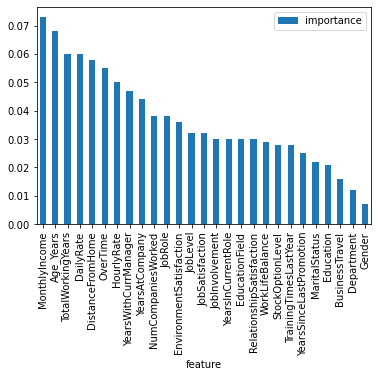

In [139]:
#Visualize the importance
importances.plot.bar()

In [142]:
import pickle
# Saving model to disk
pickle.dump(forest, open('mmm.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('mmm.pkl','rb'))